In [333]:
using JuMP, PyPlot, Gurobi

# Solution 1: Enclosing circle.
Given a set of points in the plane xi ∈ R2, we would like to find the circle with smallest possible area that contains all of the points. Explain how to model this as an optimization problem.

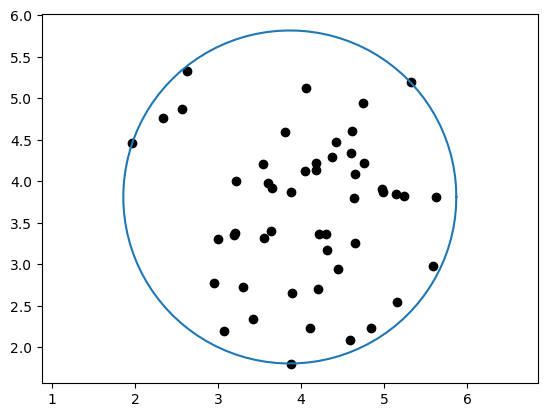

2.005268799005718
3.862493224412005
3.8101186227492225


(1.657757591748867,6.068238424925765,1.566834508292359,6.017435037983578)

In [334]:
using PyPlot
X = 4 + randn(2,50) # generate 50 random points
t = linspace(0,2pi,100) # parameter that traverses the circle

m1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1, x1)
@variable(m1, x2)
@variable(m1, r)

for i = 1:50
    @constraint(m1, (dot((X[1,i] - x1), (X[1,i]-x1)) + dot((X[2,i] - x2), (X[2,i]-x2)) <= r))
end

@objective(m1, Min, r)
solve(m1)
println(sqrt(getobjectivevalue(m1)))
println(getvalue(x1))
println(getvalue(x2))

r = sqrt(getobjectivevalue(m1))
x1 = getvalue(x1); x2 = getvalue(x2) # radius and coordinates of the center
plot( x1 + r*cos(t), x2 + r*sin(t)) # plot circle radius r with center (x1,x2)
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal"); # make x and y scales equal

# Solution 2: Quadratic form positivity
You’re presented with the constraint:
\begin{equation*}
2x^2 +2y^2 +9z^2 +8xy−6xz−6yz <= 1
\end{equation*}

<b><u>Solution 2a:</u></b> It turns out the above constraint is not convex. In other words, the set of (x, y, z) satisfying the constraint (1) is not an ellipsoid. Explain why this is the case.

The above equation can be written into the form \begin{equation*} x^TQx \end{equation*}
where Q can be written as:
Q = 
$\left[ \begin{array}{ccc}
2 & 8 & -6\\
0 & 2 & 0\\
0 & -6 & 9\\\end{array} \right]$

<br>
This can be written in the form:

$\left[ \begin{array}{c}
x\\
y\\
z\\\end{array} \right]^T$ 
$\left[ \begin{array}{ccc}
2 & p_2 & q_2\\
p_1 & 2 & r_2\\
q_1 & r_1 & 9\\\end{array} \right]$
$\left[ \begin{array}{c}
x\\
y\\
z\\\end{array} \right]$ 

<br>
where
\begin{equation*}
p_1 + p_2 = 8\\
q_1 + q_2 = -6\\
r_1 + r_2 = -6
\end{equation*}

From the class slides, any quadratic function can be written in the form \begin{equation*} x^TQx \end{equation*} where Q is symmetric matrix \begin{equation*}Q = Q^T\end{equation*}

Re-writing Q so that it's symmetric

Q = 
$\left[ \begin{array}{ccc}
2 & 4 & -3\\
4 & 2 & -3\\
-3 & -3 & 9\\\end{array} \right]$

In [335]:
Q = [2 4 -3; 4 2 -3; -3 -3 9;]

# Taking eigen values of Q

eig(Q)

([-2.0,3.0,12.0],
[0.707107 -0.57735 -0.408248; -0.707107 -0.57735 -0.408248; 0.0 -0.57735 0.816497])

\begin{equation*}
2x^2 +2y^2 +9z^2 +8xy−6xz−6yz = -2p^2 + 3q^2 + 12r^2\\
where\\
p = 0.707107x - 0.57735y - 0.408248z\\
q = -0.707107x - 0.57735y - 0.408248z\\
r = 0.0x - 0.57735y + 0.816497z
\end{equation*}

\begin{equation*} If \, Q \succ 0 \\
i.e \, all \, \lambda_i > 0\\
x^TQx ≤ b \\
\end{equation*}
\begin{align*}is \, an \, ellipsoid.\end{align*}
<br>

From above equation we can see that all lambda values are not > 0
\begin{align*}
\lambda_1 = -2\\
\lambda_2 = 3\\
\lambda_3 = 12
\end{align*}

Hence, this is not ellipsoid.
Reference Piazza and slides:
If Q is indefinite with at least one negative eigenvalue, then you get a non-convex shape that extends out to infinity. Depending on how many eigenvalues are negative, it could look like a hyperboloid, or it could look like the complement of an ellipsoid, for example.

<b><u>Solution 2b:</u></b> Show that the following QCQP is unbounded:
\begin{equation*}
maximize: \, x^2 + y^2 + z^2\\
subject \, to: constraint \, mentioned \, in \,2a
\end{equation*}

Using the eigen values and vectors obtained in 2a, will show that the following is unbounded:
<br>
<br>
$\left[ \begin{array}{ccc}
2 & 4 & -3\\
4 & 2 & -3\\
-3 & -3 & 9\\\end{array} \right]$ = 
$\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -408248\\
-0.707107 & -0.57735 & -0.408248\\
0.0 & -0.57735 & 0.816497\\\end{array} \right]$
$\left[ \begin{array}{ccc}
-2 & 0 & 0\\
0 & 3 & 0\\
0 & 0 & 12\\\end{array} \right]$
$\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -408248\\
-0.707107 & -0.57735 & -0.408248\\
0.0 & -0.57735 & 0.816497\\\end{array} \right]^T$

This is similar to 
\begin{equation*}Q = VΛV^T\end{equation*}
<br>

Define the new coordinates (isometry):
Define new coordinates\begin{equation*} z = V^Tx\\\end{equation*}
<br>
<br>
$\left[ \begin{array}{c}
p\\
q\\
r\end{array} \right]$ = 
$\left[ \begin{array}{ccc}
0.707107 & -0.57735 & -408248\\
-0.707107 & -0.57735 & -0.408248\\
0.0 & -0.57735 & 0.816497\\\end{array} \right]^T$
$\left[ \begin{array}{c}
x\\
y\\
z\end{array} \right]$
<br>

\begin{equation*}x^TQx = λ_1z_1^2 + · · · + λ_nz_n^2\\\end{equation*}

After manipulation
\begin{equation*}
2x^2 +2y^2 +9z^2 +8xy−6xz−6yz = -2p^2 + 3q^2 + 12r^2 <= 1
\end{equation*}

If some \begin{equation*}λ_k < 0 \\set \, z_k = 1 \, and \, all \, other \, z_i = 0. \\
Then \, find \, corresponding \, x \, using \, x = Vz, \, and \, x^TQx < 0\\\end{equation*}

Here p = -2 so setting q and r = 0 we calculate x

Substituting 
\begin{equation*}
x = x\\ 
y = -x\\
z = x/2\\ 
\end{equation*}
we get an equation which is unbounded for all values of x.


# Solution 3: Hovercraft rendezvous.

<b><u>Solution 3a</u></b> Find the sequence of thruster inputs for Alice (uA) and Bob (uB) that achieves a rendezvous at t = 60 while minimizing the total energy used by both hovercraft:
Plot the trajectories of each hovercraft to verify that they do indeed rendezvous

In [336]:
using JuMP, Gurobi

k = 4              # number of waypoints
T = zeros(Int,k)   # vector of timepoints
xw = zeros(2,k)    # vector of waypoint locations

T[1] = 1
T[2] = 20
T[3] = 50
T[4] = 60

m3 = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m3, xa[1:2,1:T[k]])  # resulting position
@variable(m3, va[1:2,1:T[k]])  # resulting velocity
@variable(m3, ua[1:2,1:T[k]])  # thruster input

@variable(m3, xb[1:2,1:T[k]])  # resulting position
@variable(m3, vb[1:2,1:T[k]])  # resulting velocity
@variable(m3, ub[1:2,1:T[k]])  # thruster input

# satisfy the dynamics (with initial velocity as per the input data. Alice is traveling north with 20mph while
# Bob is traveling with 30mph)
@constraint(m3, va[:,1] .== [0;20])
@constraint(m3, vb[:,1] .== [30;0])

# input dynamics as per the question
for t in 1:T[k]-1
    @constraint(m3, xa[:,t+1] .== xa[:,t] + (va[:,t]/3600))
    @constraint(m3, va[:,t+1] .== va[:,t] + ua[:,t])
    @constraint(m3, xb[:,t+1] .== xb[:,t] + (vb[:,t]/3600))
    @constraint(m3, vb[:,t+1] .== vb[:,t] + ub[:,t])
end

# Setting the starting point
@constraint(m3, xa[1, 1] == 1)
@constraint(m3, xa[2, 1] == 1)
@constraint(m3, xb[1, 1] == 1.5)
@constraint(m3, xb[2, 1] == 1)

# Since we want them to meet at a point - that we don't care so basically making them equal - rendevouz point
@constraint(m3, xa[1,T[k]] == xb[1, T[k]])
@constraint(m3, xa[2,T[k]] == xb[2, T[k]])

# minimize 2-norm (THIS IS LEAST-SQUARES)
@expression(m3, E_A, sum(ua.^2))
@expression(m3, E_B, sum(ub.^2))
@objective(m3, Min, E_A + E_B)
solve(m3)

xaopt = getvalue(xa)
xbopt = getvalue(xb)
println("Minimum Total Energy: ", getobjectivevalue(m3))

Minimum Total Energy: 105.93070479102039


In [337]:
println("****** xa opt trajectory path points: ******")
println(xaopt)
println("****** xb opt trajectory path points: ******")
println(xbopt)

****** xa opt trajectory path points: ******
[1.0 1.0 1.00043 1.00129 1.00256 1.00424 1.00632 1.00879 1.01165 1.01489 1.0185 1.02248 1.02681 1.03149 1.03651 1.04187 1.04756 1.05356 1.05988 1.0665 1.07341 1.08062 1.08811 1.09588 1.10391 1.1122 1.12075 1.12954 1.13856 1.14782 1.1573 1.167 1.17691 1.18701 1.19731 1.2078 1.21846 1.22929 1.24029 1.25144 1.26274 1.27419 1.28576 1.29747 1.30929 1.32122 1.33326 1.34539 1.35762 1.36992 1.3823 1.39475 1.40725 1.41981 1.43241 1.44505 1.45772 1.47041 1.48312 1.49583; 1.0 1.00556 1.01097 1.01624 1.02138 1.02638 1.03125 1.03598 1.04059 1.04508 1.04944 1.05368 1.05781 1.06181 1.06571 1.06949 1.07317 1.07674 1.08021 1.08358 1.08685 1.09002 1.0931 1.09609 1.09899 1.1018 1.10453 1.10718 1.10976 1.11225 1.11467 1.11702 1.1193 1.12152 1.12367 1.12576 1.12779 1.12977 1.13169 1.13356 1.13538 1.13715 1.13888 1.14057 1.14221 1.14383 1.1454 1.14695 1.14846 1.14995 1.15141 1.15286 1.15428 1.15568 1.15707 1.15845 1.15982 1.16118 1.16254 1.16389]
****** xb opt tr

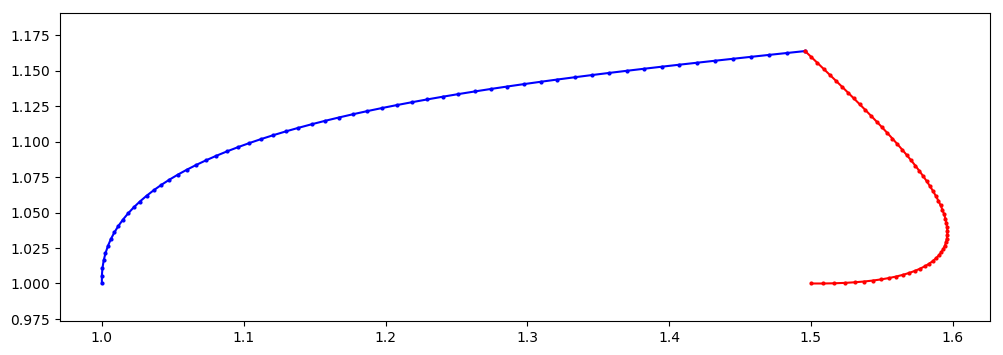

In [338]:
using PyPlot
figure(figsize=(12,4))
plot( xaopt[1,:][:], xaopt[2,:][:], "b.-", markersize=4 )
plot( xbopt[1,:][:], xbopt[2,:][:], "r.-", markersize=4 )
axis("equal");

In [339]:
println("Rendevouz point: 1.49583, 1.16389")

Rendevouz point: 1.49583, 1.16389


<b><u>Solution 3b:</u></b> In addition to arriving at the same place at the same time, Alice and Bob should also make sure their velocity vectors match when they rendezvous (otherwise, they might crash!) Solve the rendezvous problem again with the additional velocity matching constraint and plot the resulting trajectories. Is the optimal rendezvous location different from the one found in the first part?

In [340]:
using JuMP, Gurobi

k = 4              # number of waypoints
T = zeros(Int,k)   # vector of timepoints
xw = zeros(2,k)    # vector of waypoint locations

T[1] = 1
T[2] = 20
T[3] = 50
T[4] = 60

m3b = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m3b, xa[1:2,1:T[k]])  # resulting position
@variable(m3b, va[1:2,1:T[k]])  # resulting velocity
@variable(m3b, ua[1:2,1:T[k]])  # thruster input

@variable(m3b, xb[1:2,1:T[k]])  # resulting position
@variable(m3b, vb[1:2,1:T[k]])  # resulting velocity
@variable(m3b, ub[1:2,1:T[k]])  # thruster input

# satisfy the dynamics (with zero initial velocity)
# satisfy the dynamics (with zero initial velocity)
@constraint(m3b, va[:,1] .== [0;20])
@constraint(m3b, vb[:,1] .== [30;0])

@constraint(m3b, va[1, 60] == vb[1, 60])
@constraint(m3b, va[2, 60] == vb[2, 60])

for t in 1:T[k]-1
    @constraint(m3b, xa[:,t+1] .== xa[:,t] + (va[:,t]/3600))
    @constraint(m3b, va[:,t+1] .== va[:,t] + ua[:,t])
    @constraint(m3b, xb[:,t+1] .== xb[:,t] + (vb[:,t]/3600))
    @constraint(m3b, vb[:,t+1] .== vb[:,t] + ub[:,t])
end

# hit all the waypoints

# for i in [1 k]
#     @constraint(m3, xa[:,T[i]] .== xaw[:,i])
#     @constraint(m3, xb[:,T[i]] .== xbw[:,i])
# end
@constraint(m3b, xa[1, 1] == 1)
@constraint(m3b, xa[2, 1] == 1)
@constraint(m3b, xb[1, 1] == 1.5)
@constraint(m3b, xb[2, 1] == 1)

@constraint(m3b, xa[1,T[k]] == xb[1, T[k]])
@constraint(m3b, xa[2,T[k]] == xb[2, T[k]])

# @constraint(m3, xa[:,T[4]] .== 2)
# @constraint(m3, xb[:,T[4]] .== 2)

# minimize 2-norm (THIS IS LEAST-SQUARES)
@expression(m3b, E_A, sum(ua.^2))
@expression(m3b, E_B, sum(ub.^2))
@objective(m3b, Min, E_A + E_B)
solve(m3b)

xaopt = getvalue(xa)
xbopt = getvalue(xb)
println("Minimum Total Energy: ", getobjectivevalue(m3b))

Minimum Total Energy: 234.57042665108136


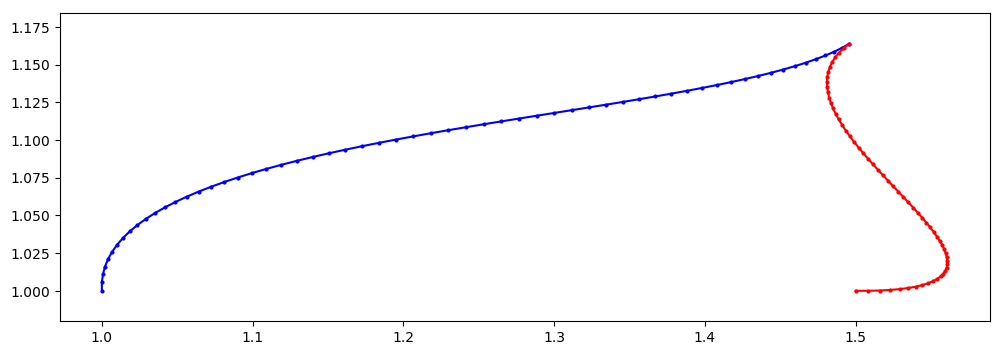

In [341]:
using PyPlot
figure(figsize=(12,4))
plot( xaopt[1,:][:], xaopt[2,:][:], "b.-", markersize=4 )
plot( xbopt[1,:][:], xbopt[2,:][:], "r.-", markersize=4 )
axis("equal");

In [342]:
getvalue(xa)

2×60 Array{Float64,2}:
 1.0  1.0      1.00071  1.0021   …  1.48003  1.48583  1.4911   1.49583
 1.0  1.00556  1.01092  1.01611     1.1561   1.15861  1.16121  1.16389

In [343]:
getvalue(xb)

2×60 Array{Float64,2}:
 1.5  1.50833  1.51596  1.5229   …  1.48664  1.48917  1.49223  1.49583
 1.0  1.0      1.00019  1.00056     1.15501  1.15806  1.16102  1.16389

<b>Explanation</b> - The rendezvous points for both a and b are same but I see that the minimum energy seems to be more in Solution 3b than 3a.

<b><u>Solution 3c:</u></b> Alice and Bob forgot about one important detail. The hovercrafts each have a top speed of 35 mph. The solutions found in the previous parts are unacceptable because they require Alice to exceed the maximum allowable speed. First, verify that this is indeed the case. Second, explain how to alter your model to account for the speed limit. Finally, solve the rendezvous problem one last time with all the constraints in place and verify that your solution respects the speed limit.

In [344]:
println(getvalue(va))

[-0.0 2.54237 5.00584 7.39041 9.69608 11.9229 14.0707 16.1397 18.1297 20.0409 21.8732 23.6265 25.301 26.8966 28.4132 29.851 31.2098 32.4898 33.6908 34.813 35.8562 36.8206 37.706 38.5126 39.2402 39.889 40.4588 40.9497 41.3618 41.6949 41.9492 42.1245 42.2209 42.2385 42.1771 42.0368 41.8177 41.5196 41.1426 40.6867 40.152 39.5383 38.8457 38.0742 37.2238 36.2946 35.2864 34.1993 33.0333 31.7884 30.4646 29.062 27.5804 26.0199 24.3805 22.6622 20.865 18.9889 17.0339 15.0; 20.0 19.322 18.6616 18.0187 17.3933 16.7855 16.1952 15.6224 15.0672 14.5295 14.0094 13.5067 13.0216 12.5541 12.104 11.6715 11.2566 10.8591 10.4793 10.1169 9.77206 9.44477 9.13501 8.84278 8.56809 8.31093 8.0713 7.84921 7.64465 7.45763 7.28814 7.13618 7.00175 6.88486 6.78551 6.70368 6.63939 6.59264 6.56341 6.55172 6.55757 6.58095 6.62186 6.6803 6.75628 6.8498 6.96084 7.08942 7.23553 7.39918 7.58036 7.77908 7.99532 8.22911 8.48042 8.74927 9.03565 9.33957 9.66102 10.0]


In [345]:
println(getvalue(vb))

[30.0 27.4576 24.9942 22.6096 20.3039 18.0771 15.9293 13.8603 11.8703 9.95909 8.12683 6.37347 4.69901 3.10345 1.58679 0.149036 -1.20982 -2.48977 -3.69082 -4.81297 -5.85622 -6.82057 -7.70602 -8.51257 -9.24021 -9.88895 -10.4588 -10.9497 -11.3618 -11.6949 -11.9492 -12.1245 -12.2209 -12.2385 -12.1771 -12.0368 -11.8177 -11.5196 -11.1426 -10.6867 -10.152 -9.53828 -8.8457 -8.07423 -7.22385 -6.29456 -5.28638 -4.1993 -3.03331 -1.78843 -0.464641 0.938048 2.41964 3.98013 5.61952 7.33781 9.13501 11.0111 12.9661 15.0; -0.0 0.677966 1.3384 1.9813 2.60666 3.21449 3.80479 4.37756 4.93279 5.47049 5.99065 6.49328 6.97838 7.44594 7.89597 8.32846 8.74342 9.14085 9.52075 9.88311 10.2279 10.5552 10.865 11.1572 11.4319 11.6891 11.9287 12.1508 12.3553 12.5424 12.7119 12.8638 12.9982 13.1151 13.2145 13.2963 13.3606 13.4074 13.4366 13.4483 13.4424 13.4191 13.3781 13.3197 13.2437 13.1502 13.0392 12.9106 12.7645 12.6008 12.4196 12.2209 12.0047 11.7709 11.5196 11.2507 10.9643 10.6604 10.339 10.0]


We can see that velocities > 35 in the above solution and so we will need to put a constraint. Basically constraint will be sum of squares of all velocoty variabes for each t <= maxspeed

In [346]:
using JuMP, Gurobi

k = 4              # number of waypoints
T = zeros(Int,k)   # vector of timepoints
xw = zeros(2,k)    # vector of waypoint locations

T[1] = 1
T[2] = 20
T[3] = 50
T[4] = 60

m3c = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m3c, xa[1:2,1:T[k]])  # resulting position
@variable(m3c, va[1:2,1:T[k]])  # resulting velocity
@variable(m3c, ua[1:2,1:T[k]])  # thruster input

@variable(m3c, xb[1:2,1:T[k]])  # resulting position
@variable(m3c, vb[1:2,1:T[k]])  # resulting velocity
@variable(m3c, ub[1:2,1:T[k]])  # thruster input

# satisfy the dynamics (withinitial velocity)
@constraint(m3c, va[:,1] .== [0;20])
@constraint(m3c, vb[:,1] .== [30;0])

# constrain that the velocity at the t = 60 
@constraint(m3c, va[1, 60] == vb[1, 60])
@constraint(m3c, va[2, 60] == vb[2, 60])

# Constraint as both the hovercrafts cannot exceed 35mph speed

for t in 1:T[k]-1
    @constraint(m3c, sum(va[:, t].^2) <= 35^2)
    @constraint(m3c, sum(vb[:, t].^2) <= 35^2)    
end

for t in 1:T[k]-1
    @constraint(m3c, xa[:,t+1] .== xa[:,t] + (va[:,t]/3600))
    @constraint(m3c, va[:,t+1] .== va[:,t] + ua[:,t])
    @constraint(m3c, xb[:,t+1] .== xb[:,t] + (vb[:,t]/3600))
    @constraint(m3c, vb[:,t+1] .== vb[:,t] + ub[:,t])
end

@constraint(m3c, xa[1, 1] == 1)
@constraint(m3c, xa[2, 1] == 1)
@constraint(m3c, xb[1, 1] == 1.5)
@constraint(m3c, xb[2, 1] == 1)

@constraint(m3c, xa[1,T[k]] == xb[1, T[k]])
@constraint(m3c, xa[2,T[k]] == xb[2, T[k]])

# minimize 2-norm (THIS IS LEAST-SQUARES)
@expression(m3c, E_A, sum(ua.^2))
@expression(m3c, E_B, sum(ub.^2))
@objective(m3c, Min, E_A + E_B)
solve(m3c)

xaopt = getvalue(xa)
xbopt = getvalue(xb)
println("Minimum Total Energy: ", getobjectivevalue(m3c))

Minimum Total Energy: 238.10494999910043


In [347]:
println(getvalue(va))

[-0.0 2.37206 4.65946 6.86214 8.98015 11.0135 12.9621 14.826 16.6053 18.2998 19.9096 21.4348 22.8752 24.231 25.502 26.6883 27.79 28.8069 29.7391 30.5866 31.3494 32.0275 32.6209 33.1295 33.5534 33.8922 34.1459 34.3139 34.3988 34.4423 34.4787 34.5088 34.5331 34.552 34.5648 34.517 34.3846 34.1666 33.8635 33.4755 33.0027 32.4452 31.803 31.076 30.2644 29.3681 28.387 27.3213 26.1708 24.9357 23.6159 22.2113 20.7221 19.1482 17.4896 15.7463 13.9184 12.0057 10.0083 7.92623; 20.0 19.2931 18.6027 17.9288 17.2715 16.6307 16.0065 15.3988 14.8077 14.233 13.6749 13.1334 12.6084 12.1 11.6081 11.1327 10.6739 10.2316 9.80592 9.39676 9.00414 8.62808 8.26856 7.92558 7.59912 7.28917 6.99565 6.71849 6.45816 6.22258 6.01748 5.84244 5.69713 5.58128 5.49464 5.42842 5.37876 5.34551 5.32875 5.32851 5.34481 5.37765 5.42705 5.493 5.5755 5.67455 5.79016 5.92232 6.07102 6.23628 6.41809 6.61645 6.83136 7.06282 7.31083 7.57538 7.85649 8.15414 8.46834 8.79908]


In [348]:
println(getvalue(vb))

[30.0 27.1698 24.4244 21.7637 19.1874 16.6959 14.2891 11.967 9.72962 7.57689 5.50883 3.52543 1.6267 -0.187332 -1.91667 -3.56131 -5.12125 -6.5965 -7.98705 -9.2929 -10.5141 -11.6505 -12.7023 -13.6694 -14.5517 -15.3494 -16.0624 -16.6907 -17.2342 -17.6931 -18.0673 -18.3568 -18.5616 -18.6816 -18.717 -18.6677 -18.5337 -18.3149 -18.0115 -17.6233 -17.1505 -16.593 -15.9507 -15.2238 -14.4121 -13.5158 -12.5347 -11.469 -10.3186 -9.08341 -7.76356 -6.35903 -4.86979 -3.29587 -1.63726 0.106033 1.93403 3.84673 5.84414 7.92623; -0.0 0.629021 1.24151 1.83743 2.41681 2.97966 3.52595 4.05569 4.56886 5.06548 5.54556 6.0091 6.45608 6.88651 7.30039 7.69772 8.07851 8.44275 8.79044 9.12159 9.43619 9.73425 10.0158 10.2807 10.5291 10.761 10.9763 11.1751 11.3573 11.523 11.6722 11.8047 11.9208 12.0203 12.1032 12.1696 12.2195 12.2528 12.2695 12.2697 12.2534 12.2205 12.1711 12.1051 12.0225 11.9235 11.8078 11.6757 11.527 11.3617 11.1799 10.9815 10.7667 10.5352 10.2872 10.0227 9.74164 9.44401 9.12983 8.79908]


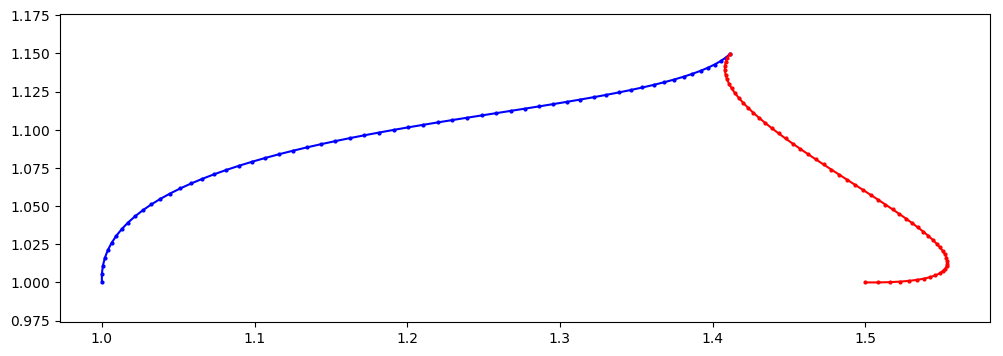

In [349]:
using PyPlot
figure(figsize=(12,4))
plot( xaopt[1,:][:], xaopt[2,:][:], "b.-", markersize=4 )
plot( xbopt[1,:][:], xbopt[2,:][:], "r.-", markersize=4 )
axis("equal");

In [350]:
getvalue(xa)

2×60 Array{Float64,2}:
 1.0  1.0      1.00066  1.00195  …  1.40133  1.40519  1.40853  1.41131
 1.0  1.00556  1.01091  1.01608     1.14273  1.14491  1.14717  1.14953

In [351]:
getvalue(xb)

2×60 Array{Float64,2}:
 1.5  1.50833  1.51588  1.52267  …  1.40808  1.40861  1.40968  1.41131
 1.0  1.0      1.00017  1.00052     1.14166  1.14437  1.14699  1.14953